<a href="https://colab.research.google.com/github/Eistein/data_visualization_project/blob/main/Python_Visualising_Webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

### Learning Outcome
* Python Basic Visuals
* Interactive Visuals
* Python Dashboards

## Imports and Installs

In [ ]:
pip install ipywidgets

In [2]:
import ipywidgets as wg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bokeh.plotting import figure, show
from bokeh.layouts import row

In [3]:
# most commom packages
from ipywidgets import interact, interactive, fixed, interact_manual

## Basic Visualisations

In [ ]:
diamonds_df.head()

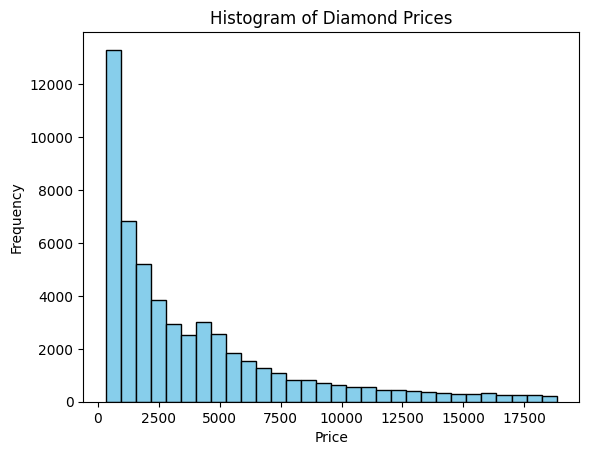

In [5]:
diamonds_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv")

# Plot histogram of diamond prices
plt.hist(diamonds_df['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Diamond Prices')
plt.show()

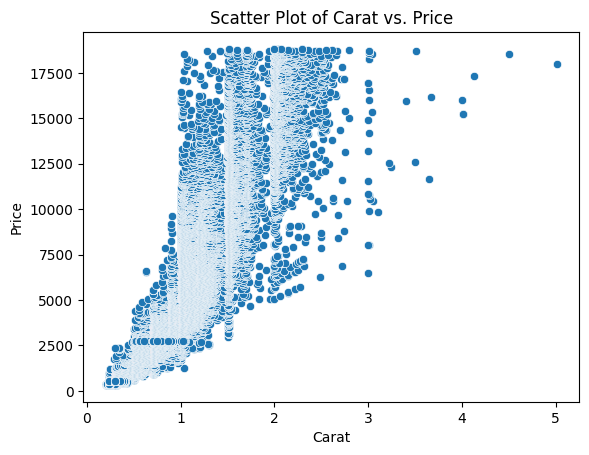

In [ ]:
import seaborn as sns

# Scatter plot of carat vs. price
sns.scatterplot(data=diamonds_df, x='carat', y='price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Scatter Plot of Carat vs. Price')
plt.show()

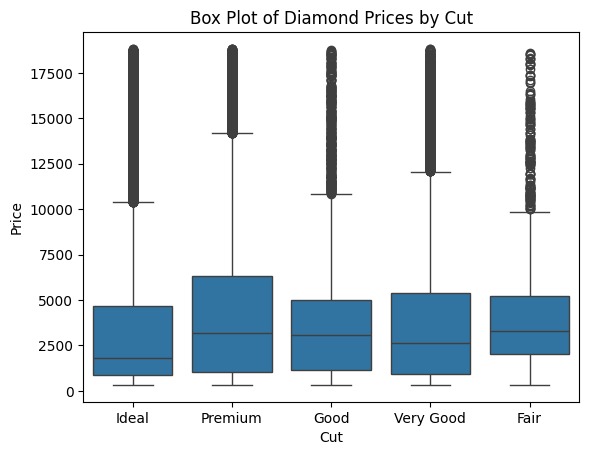

In [ ]:
# Box plot of prices grouped by cut
sns.boxplot(data=diamonds_df, x='cut', y='price')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Box Plot of Diamond Prices by Cut')
plt.show()

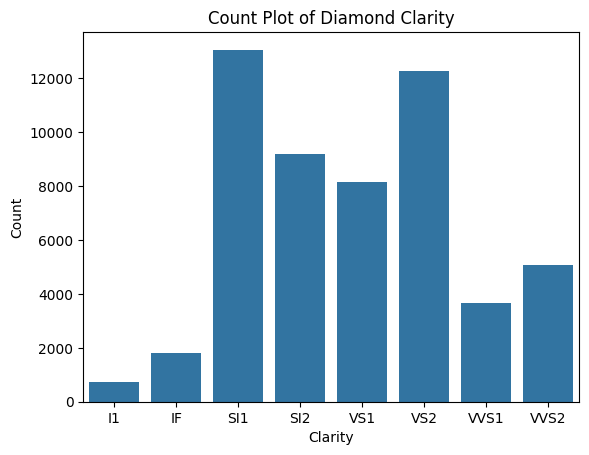

In [ ]:
# Count plot of diamond clarity
sns.countplot(data=diamonds_df, x='clarity', order=sorted(diamonds_df['clarity'].unique()))
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.title('Count Plot of Diamond Clarity')
plt.show()

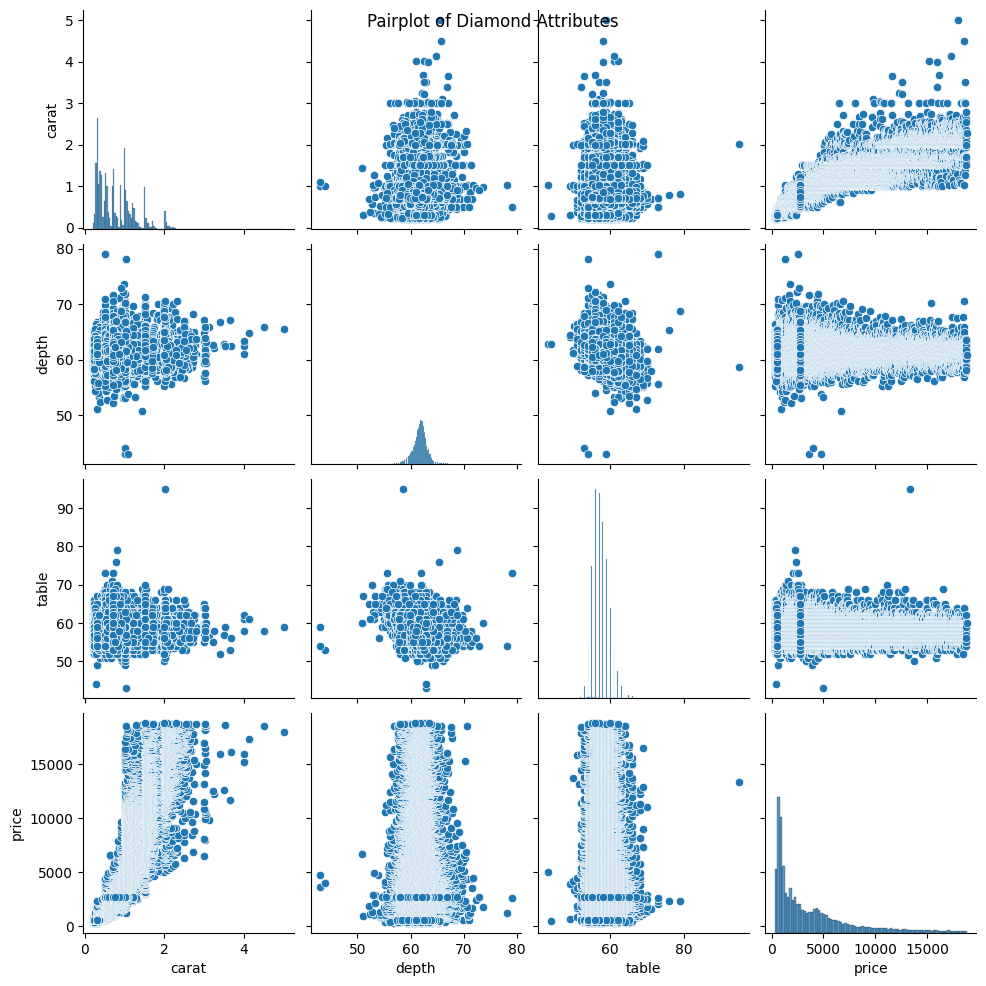

In [ ]:
# Pairplot of numeric attributes
sns.pairplot(diamonds_df[['carat', 'depth', 'table', 'price']])
plt.suptitle('Pairplot of Diamond Attributes')
plt.show()

## Basic Interact

The basic level, interact autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use `interact`, you need to `define a function` that you want to explore. Here is a function that returns its only argument `x`

In [ ]:
def func(x):
    return x

In [ ]:
interact(func, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [ ]:
interact(func, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

In [ ]:
interact(func, x='Hello World');

interactive(children=(Text(value='Hello World', description='x'), Output()), _dom_classes=('widget-interact',)…

### Accessing the interact while defining the function

Simply use the `@interact`

In [ ]:
@interact(x=True, y=1.0, z='Hel')
def g(x, y,z):
    return (x, y,z)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

### Fixing arguments using fixed

There are times when you may want to explore a function using interact, but fix one or more of its arguments to specific values. This can be accomplished by wrapping values with the fixed function.

In [ ]:
def f(p, q):
    return (p, q)
interact(f, p=5, q=fixed(20))

interactive(children=(IntSlider(value=5, description='p', max=15, min=-5), Output()), _dom_classes=('widget-in…

<function __main__.f(p, q)>

The following table gives an overview of different argument types, and how they map to interactive controls:

<table class="table table-condensed table-bordered">
  <tr><td><strong>Keyword argument</strong></td><td><strong>Widget</strong></td></tr>  
  <tr><td>`True` or `False`</td><td>Checkbox</td></tr>  
  <tr><td>`'Hi there'`</td><td>Text</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if integers are passed</td><td>IntSlider</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if floats are passed</td><td>FloatSlider</td></tr>
  <tr><td>`['orange','apple']` or `[('one', 1), ('two', 2)]</td><td>Dropdown</td></tr>
</table>
Note that a dropdown is used if a list or a list of tuples is given (signifying discrete choices), and a slider is used if a tuple is given (signifying a range).

In [ ]:
def r(x):
  return x

In [ ]:
interact(r, x = ['orange','apple'])

interactive(children=(Dropdown(description='x', options=('orange', 'apple'), value='orange'), Output()), _dom_…

<function __main__.r(x)>

Tuple of length 2 -> min and max

In [ ]:
interact(func, x=(0.0,10.0))

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0), Output()), _dom_classes=('widget-inte…

<function __main__.func(x)>

Tuple of length 3 -> min, max and step

In [ ]:
interact(func, x=(0.0,10.0,2))

interactive(children=(FloatSlider(value=4.0, description='x', max=10.0, step=2.0), Output()), _dom_classes=('w…

<function __main__.func(x)>

### Dropdown

In [ ]:
interact(func, x=['apples','oranges'])

interactive(children=(Dropdown(description='x', options=('apples', 'oranges'), value='apples'), Output()), _do…

<function __main__.func(x)>

If you want a dropdown menu that passes non-string values to the Python function, you can pass a list of `('label', value)` pairs. The first items are the names in the dropdown menu UI and the second items are values that are the arguments passed to the underlying Python function.

In [ ]:
interact(func, x=wg.Combobox(options=["Chicago", "New York", "Washington"], value="Chicago"));

interactive(children=(Combobox(value='Chicago', description='x', options=('Chicago', 'New York', 'Washington')…

In [ ]:
def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = wg.interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

## Python Dash

Dash is built on top of Plotly, which is another powerful library for creating interactive visualizations. You can also install Plotly to enhance your Dash applications:

### Imports

In [ ]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 32.0 MB/s eta 0:00:00


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

<ipython-input-53-95f2401b88ff>:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-53-95f2401b88ff>:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


### Create a Dash application


In [ ]:
app = dash.Dash(__name__)

In [ ]:
# Sample data
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [10, 11, 12, 13, 14]
})
# Define the layout of your app
app.layout = html.Div([
    html.H1("My First Dash Application"),

    dcc.Graph(
        id='scatter-plot',
        figure={
            'data': [
                {'x': data['x'], 'y': data['y'], 'type': 'scatter', 'mode': 'markers', 'name': 'Scatter Plot'},
            ],
            'layout': {
                'title': 'Scatter Plot Example'
            }
        }
    )
])

### Run the Dash app

In [ ]:
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

## SweetViz

SweetViz Library is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA with just two lines of code. Output is a fully self-contained HTML application. The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

### **Some of the features of SweetViz Library**

* It shows how a target value(dependent features) relates to other features.
* It integrates associations for numerical (Pearson’s correlation), categorical (uncertainty coefficient), and categorical-numerical (correlation ratio) datatypes seamlessly, to provide maximum information for all data types.
* It automatically detects numerical, categorical, and text features, with optional manual overrides.
* Summary information about the type, unique values, missing values, duplicate rows, most frequent values.
* Numeric Analysis such as min/max/range, quartiles, mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness.

## Data Ingest

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 41.7 MB/s eta 0:00:00


In [ ]:
import sweetviz

In [ ]:
my_report = sweetviz.analyze([df, "Diamonds"],target_feat='price')

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Steroid Dashboard

In [ ]:
pip install jupyter-dash

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load the dataset
diamonds_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv")

# Create a Dash app instance
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Diamond Dashboard"),
    dcc.Dropdown(
        id='x-axis',
        options=[
            {'label': col, 'value': col} for col in ['carat', 'depth', 'table', 'price']
        ],
        value='carat',
        clearable=False
    ),
    dcc.Dropdown(
        id='y-axis',
        options=[
            {'label': col, 'value': col} for col in ['carat', 'depth', 'table', 'price']
        ],
        value='price',
        clearable=False
    ),
    dcc.Graph(id='scatter-plot')
])

# Define callback to update scatter plot
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-axis', 'value'),
     Input('y-axis', 'value')]
)
def update_scatter_plot(x_axis, y_axis):
    # Create scatter plot
    fig = px.scatter(diamonds_df, x=x_axis, y=y_axis, trendline="ols")
    fig.update_layout(title=f"{y_axis} vs {x_axis} Scatter Plot")
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(mode='inline')


<IPython.core.display.Javascript object>

# Run this code in Jupyter to see output

The dashboard will consist of the following components:

* **Title**: The title of the dashboard will be "Diamond Dashboard".

* **Dropdown Menus**: There will be two dropdown menus labeled "X-axis" and "Y-axis". These dropdown menus will allow the user to select which variables to display on the x-axis and y-axis of the scatter plot.

* **Scatter Plot**: Below the dropdown menus, there will be a scatter plot. Initially, it will display the relationship between the "carat" (weight of the diamond) and "price" variables. As the user selects different variables from the dropdown menus, the scatter plot will update dynamically to display the relationship between the selected variables.

* **Trendline**: Additionally, a trendline will be displayed on the scatter plot, showing the overall trend of the data.

### Learning Outcome
* Python Basic Visuals
* Interactive Visuals
* Python Dashboards